
# Linear Regression using theano

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import theano as th

In [4]:
xdata=np.asarray([1.2,2.0,3.6,5.8,9.11,8.51,12.55,18.52,45.12,65.12])
ydata=np.asarray([1,0,0,1,0,1,0,1,1,0])

In [5]:
len(ydata)

10

In [6]:
len(xdata)

10

In [7]:
x=th.tensor.vector(name='x')
y=th.tensor.vector(name='y')

In [8]:
# get the value of m and c constants
m=th.shared(np.random.randn(),name='m')
c=th.shared(np.random.randn(),name='c')

In [9]:
#y=mX+c here y is yh
yh=np.dot(x,m)+c

In [10]:
n=len(xdata)#here we put the length of xdata in n variable
cost=th.tensor.sum((y-yh)**2)/(2*n)

In [11]:
djdm=th.tensor.grad(cost,m)
djdc=th.tensor.grad(cost,c)
#here we find new values of m and c constants 
mnew = m-0.0005*djdm
cnew = c-0.0005*djdc

In [12]:
train=th.function([x,y],cost,updates=[(m,mnew),(c,cnew)])
test=th.function([x],yh)

In [13]:
costval=[]
for i in range(40000):
    costm=train(xdata,ydata)
    costval.append(costm)

In [14]:
print(costm)

0.12445872188685901


In [15]:
a=np.linspace(0,70,20)
b=test(a)
print(b)

[0.52808627 0.52205563 0.51602498 0.50999434 0.5039637  0.49793306
 0.49190242 0.48587178 0.47984114 0.4738105  0.46777986 0.46174922
 0.45571858 0.44968794 0.44365729 0.43762665 0.43159601 0.42556537
 0.41953473 0.41350409]


In [16]:
print('final value of m is'+str(m.get_value()))
print('final value of c is'+str(c.get_value()))
print('----------------------------------')
print('Test data value is=')
print(test([65.12]))

final value of m is-0.001636888213520893
final value of c is0.5280862657951734
----------------------------------
Test data value is=
[0.42149211]


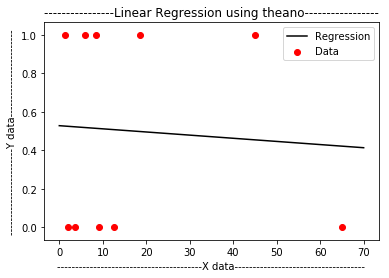

In [17]:
plt.scatter(xdata,ydata,color='red',label='Data')
plt.plot(a,b,color='black',label='Regression')
plt.title("----------------Linear Regression using theano-----------------")
plt.xlabel("----------------------------------------X data------------------------------------")
plt.ylabel("------------------------Y data------------------------")
plt.legend(loc=1)
plt.show()